<a href="https://colab.research.google.com/github/sircvince/sircvince/blob/main/CSCI218_GroupProject_Code_RNN_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Preparation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Load dataset
data_path = 'enron_spam_data.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Fill missing values (if any)
data = data.dropna(subset=['Message'])

# Encode labels (ham: 0, spam: 1)
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['Spam/Ham'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['label'], test_size=0.2, random_state=42)

# Convert text data to numerical data using TfidfVectorizer
# Ensure only the 'Message' column is used for vectorization, excluding the label
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)  # Limiting to top 10,000 features
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


   Message ID                       Subject  \
0           0  christmas tree farm pictures   
1           1      vastar resources , inc .   
2           2  calpine daily gas nomination   
3           3                    re : issue   
4           4     meter 7268 nov allocation   

                                             Message Spam/Ham        Date  
0                                                NaN      ham  1999-12-10  
1  gary , production from the high island larger ...      ham  1999-12-13  
2             - calpine daily gas nomination 1 . doc      ham  1999-12-14  
3  fyi - see note below - already done .\nstella\...      ham  1999-12-14  
4  fyi .\n- - - - - - - - - - - - - - - - - - - -...      ham  1999-12-14  
Message ID      0
Subject       289
Message       371
Spam/Ham        0
Date            0
dtype: int64


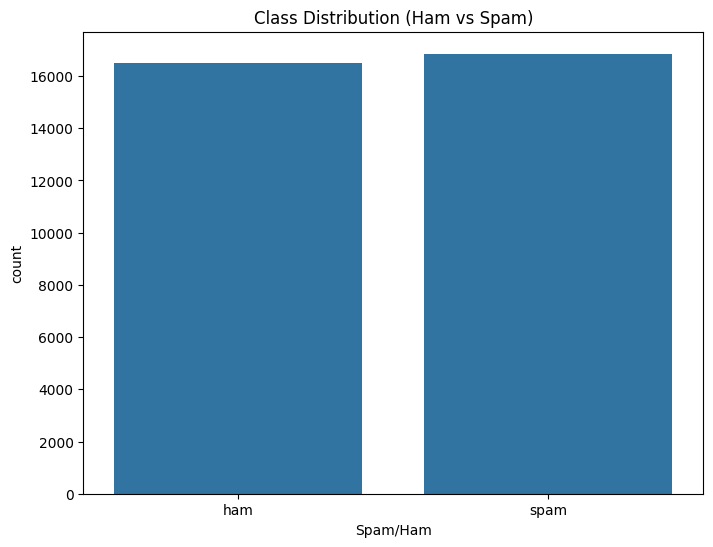

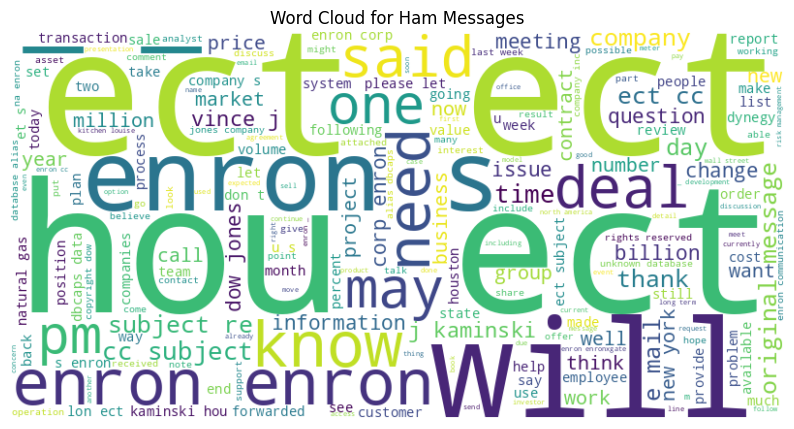

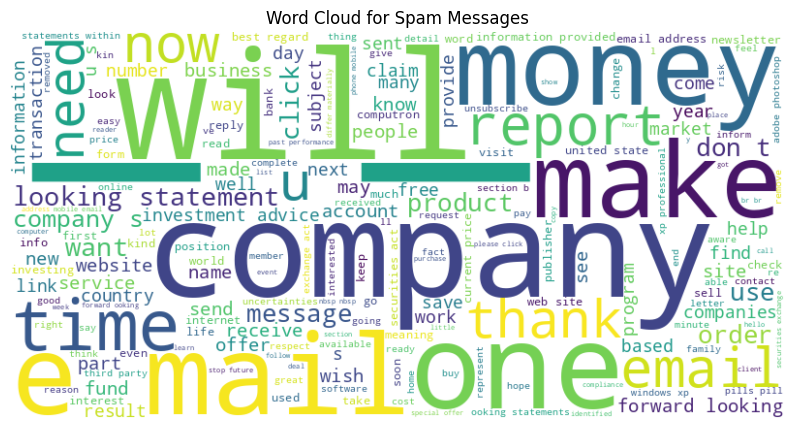

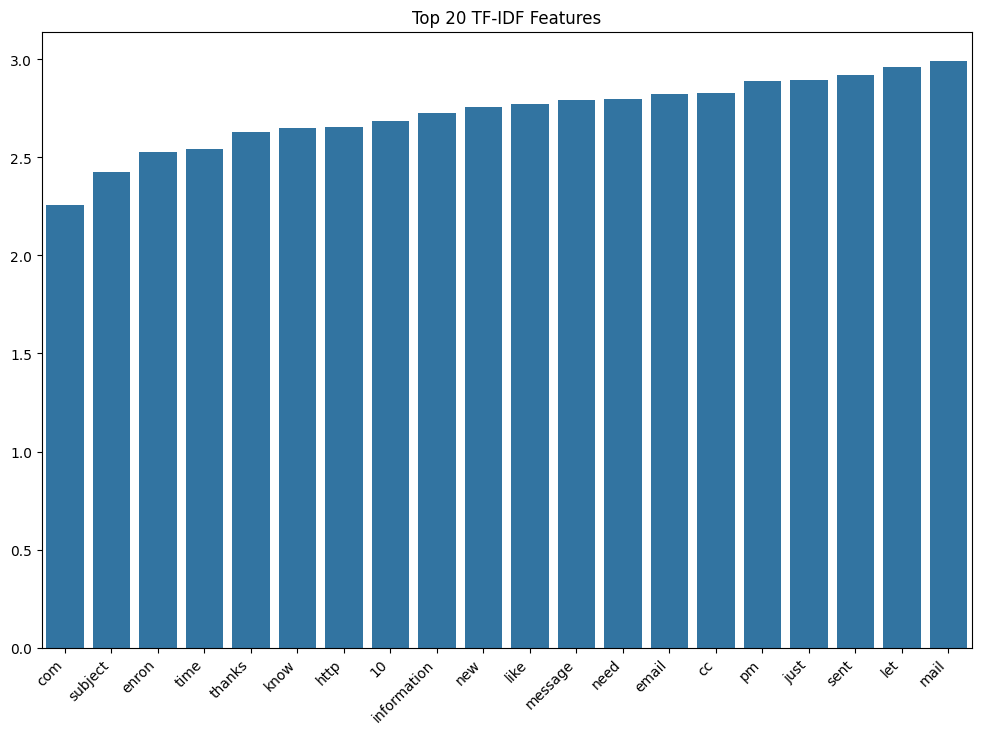

In [ ]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Spam/Ham', data=data)
plt.title('Class Distribution (Ham vs Spam)')
plt.show()

# Word Cloud for Ham Messages
ham_words = ' '.join(list(data[data['Spam/Ham'] == 'ham']['Message']))
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)

plt.figure(figsize=(10, 8))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')
plt.show()

# Word Cloud for Spam Messages
spam_words = ' '.join(list(data[data['Spam/Ham'] == 'spam']['Message']))
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

plt.figure(figsize=(10, 8))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')
plt.show()

# TF-IDF Feature Importance (Top 20 features)
import numpy as np

# Get feature names and their importance
feature_names = vectorizer.get_feature_names_out()
sorted_items = np.argsort(vectorizer.idf_)

top_n = 20
top_features = feature_names[sorted_items[:top_n]]

# Plot the top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x=top_features, y=vectorizer.idf_[sorted_items[:top_n]])
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 TF-IDF Features')
plt.show()


Best parameters: {'alpha': 0.5}
Best cross-validation accuracy: 0.981031602286954
Test accuracy with best params: 0.98530514319988
Cross-validated accuracy scores: [0.982009   0.98294283 0.98013121 0.98069353 0.97938144]
Mean cross-validated accuracy: 0.981031602286954


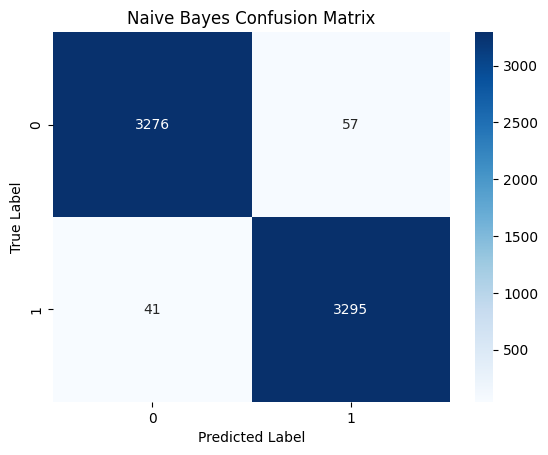

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3333
           1       0.98      0.99      0.99      3336

    accuracy                           0.99      6669
   macro avg       0.99      0.99      0.99      6669
weighted avg       0.99      0.99      0.99      6669



In [ ]:
# Model 1: Naive Bayes with Hyperparameter Tuning and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Define the parameter grid
param_grid_nb = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}

# Perform grid search
grid_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, scoring='accuracy')
grid_nb.fit(X_train_vec, y_train)

# Best parameters and score
print(f"Best parameters: {grid_nb.best_params_}")
print(f"Best cross-validation accuracy: {grid_nb.best_score_}")

# Evaluate on test data
y_pred_nb = grid_nb.predict(X_test_vec)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Test accuracy with best params: {nb_accuracy}")

# Cross-validation
cv_scores = cross_val_score(MultinomialNB(alpha=grid_nb.best_params_['alpha']), X_train_vec, y_train, cv=5)
print(f"Cross-validated accuracy scores: {cv_scores}")
print(f"Mean cross-validated accuracy: {cv_scores.mean()}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
nb_report = classification_report(y_test, y_pred_nb)
print(nb_report)


Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 0.9853801169590644
Test accuracy with best params: 0.9893537261958315
Cross-validated accuracy scores: [0.98744378 0.98631678 0.98669166 0.98762887 0.98650422]
Mean cross-validated accuracy: 0.9869170592772967


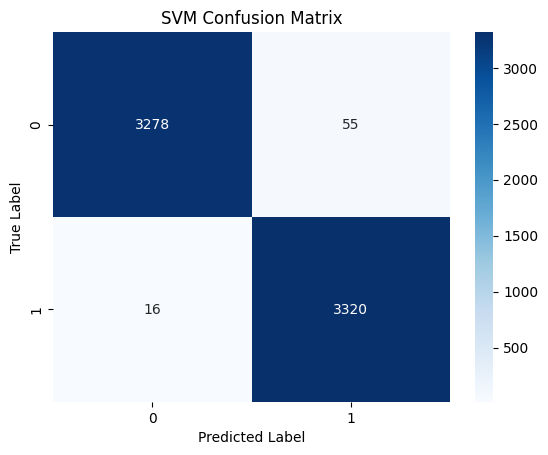

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3333
           1       0.98      1.00      0.99      3336

    accuracy                           0.99      6669
   macro avg       0.99      0.99      0.99      6669
weighted avg       0.99      0.99      0.99      6669



In [ ]:
# Model 2: Support Vector Machine (SVM) with Hyperparameter Tuning and Validation
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the reduced parameter grid
param_grid_svm = {'C': [0.1, 1],
                  'kernel': ['linear'],
                  'gamma': ['scale']}

# Perform grid search with reduced parameters
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=3, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train_vec, y_train)

# Best parameters and score
print(f"Best parameters: {grid_svm.best_params_}")
print(f"Best cross-validation accuracy: {grid_svm.best_score_}")

# Evaluate on test data
y_pred_svm = grid_svm.predict(X_test_vec)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Test accuracy with best params: {svm_accuracy}")

# Cross-validation
cv_scores_svm = cross_val_score(SVC(**grid_svm.best_params_), X_train_vec, y_train, cv=5)
print(f"Cross-validated accuracy scores: {cv_scores_svm}")
print(f"Mean cross-validated accuracy: {cv_scores_svm.mean()}")

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
svm_report = classification_report(y_test, y_pred_svm)
print(svm_report)


In [ ]:
pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.4 MB/s eta 0:00:00


Epoch 1/3
334/334 ━━━━━━━━━━━━━━━━━━━━ 80s 227ms/step - accuracy: 0.8920 - loss: 0.2900 - val_accuracy: 0.9723 - val_loss: 0.0904
Epoch 2/3
334/334 ━━━━━━━━━━━━━━━━━━━━ 86s 241ms/step - accuracy: 0.9816 - loss: 0.0614 - val_accuracy: 0.9762 - val_loss: 0.0725
Epoch 3/3
334/334 ━━━━━━━━━━━━━━━━━━━━ 76s 223ms/step - accuracy: 0.9875 - loss: 0.0373 - val_accuracy: 0.9794 - val_loss: 0.0704
209/209 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.9826 - loss: 0.0527
RNN Test Accuracy: 0.9817063808441162
209/209 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step


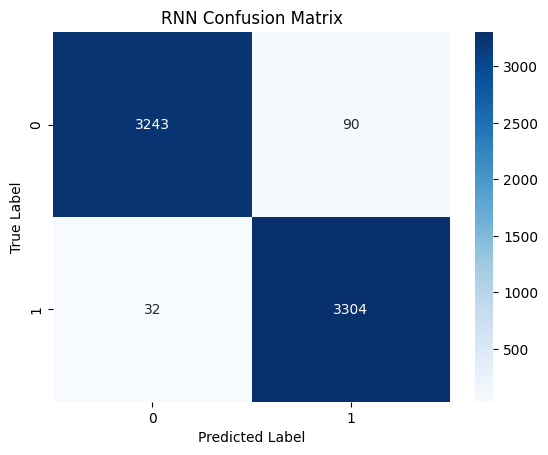

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3333
           1       0.97      0.99      0.98      3336

    accuracy                           0.98      6669
   macro avg       0.98      0.98      0.98      6669
weighted avg       0.98      0.98      0.98      6669



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Tokenize and pad the sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_seq, maxlen=100)
X_test_padded = pad_sequences(X_test_seq, maxlen=100)

# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=3, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate on test data
rnn_loss, rnn_accuracy = model.evaluate(X_test_padded, y_test)
print(f"RNN Test Accuracy: {rnn_accuracy}")

# Predict on the test data
y_pred_rnn = (model.predict(X_test_padded) > 0.5).astype("int32")

# Confusion Matrix
conf_matrix_rnn = confusion_matrix(y_test, y_pred_rnn)
sns.heatmap(conf_matrix_rnn, annot=True, fmt='d', cmap='Blues')
plt.title('RNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
rnn_report = classification_report(y_test, y_pred_rnn)
print(rnn_report)


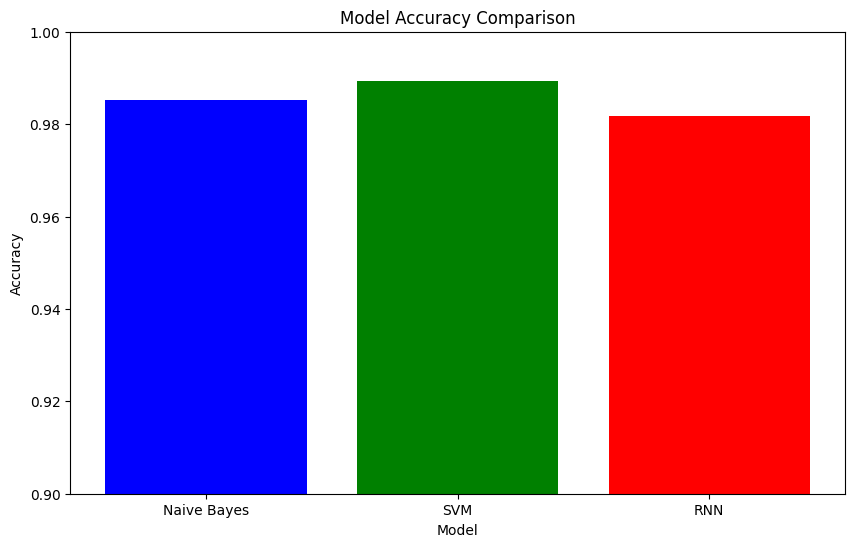

Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3333
           1       0.98      0.99      0.99      3336

    accuracy                           0.99      6669
   macro avg       0.99      0.99      0.99      6669
weighted avg       0.99      0.99      0.99      6669


SVM Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3333
           1       0.98      1.00      0.99      3336

    accuracy                           0.99      6669
   macro avg       0.99      0.99      0.99      6669
weighted avg       0.99      0.99      0.99      6669


RNN Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3333
           1       0.97      0.99      0.98      3336

    accuracy                           0.98      6669
   macro avg       0.98      0.98      0.98      6669
weighted avg       0.98     

In [ ]:
# Comparison and Visualization
import matplotlib.pyplot as plt

# Accuracy comparison
models = ['Naive Bayes', 'SVM', 'RNN']
accuracies = [nb_accuracy, svm_accuracy, rnn_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1.0])
plt.show()

# Detailed classification reports for comparison
print("Naive Bayes Report:")
print(nb_report)
print("\nSVM Report:")
print(svm_report)
print("\nRNN Report:")
print(rnn_report)
